In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('pitching.csv')

In [ ]:
df = df[df['Player'] != 'Team Totals']


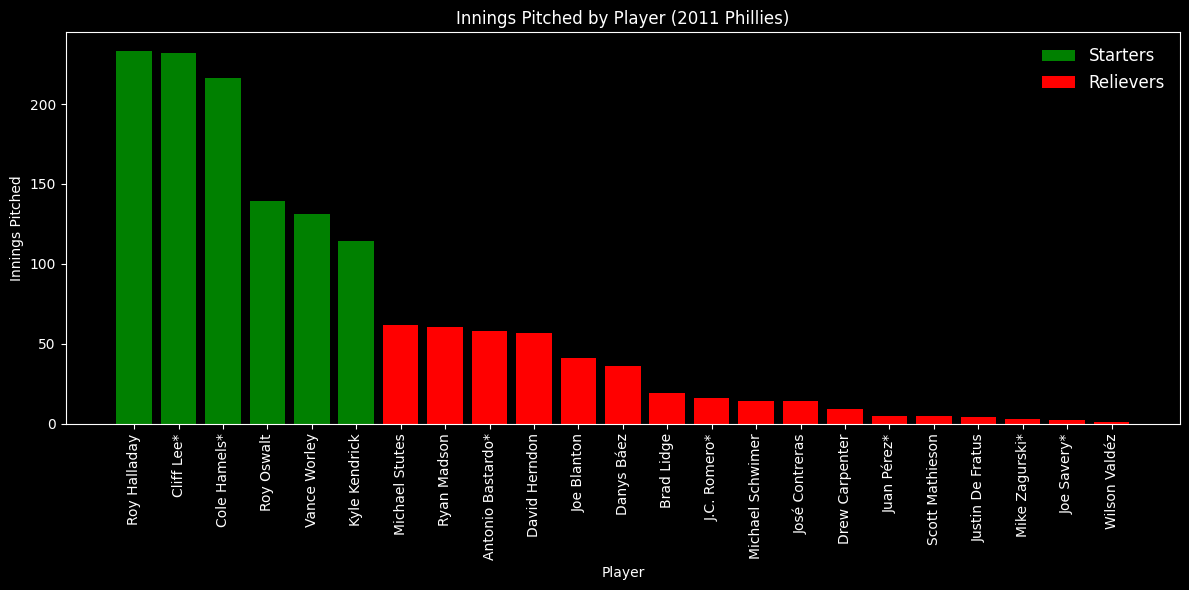

In [ ]:
# Set dark background style
plt.style.use('dark_background')

# Sort the DataFrame by 'IP' (Innings Pitched) in descending order
df_sorted = df.sort_values(by='IP', ascending=False)

# Create a list of colors: green for the top 6 (Starting Pitchers), red for the rest (Bullpen)
colors = ['green' if i < 6 else 'red' for i in range(len(df_sorted))]

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted['Player'], df_sorted['IP'], color=colors)

# Add labels and title with light colors for readability
plt.xlabel('Player', color='white')
plt.ylabel('Innings Pitched', color='white')
plt.title('Innings Pitched by Player (2011 Phillies)', color='white')

# Change tick labels to white for better contrast
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')

# Add legend: "green" is for Starting Pitchers, "red" is for Bullpen
plt.legend(
    handles=[bars[0], bars[-1]],  # Use the first bar (starting pitcher) and last bar (bullpen) for handles
    labels=['Starters', 'Relievers'],  # Custom labels
    loc='upper right',  # Position the legend at the top right
    frameon=False,  # Remove the background box around the legend
    fontsize=12,  # Optional: adjust font size for legend
    facecolor='black',  # Optional: set legend background color (if frameon=True)
    edgecolor='white'  # Optional: set the edge color of the legend box
)

# Display the plot
plt.tight_layout()
plt.show()

Average innings pitched

In [ ]:
df2 = pd.read_csv('July 26 - Present.csv')

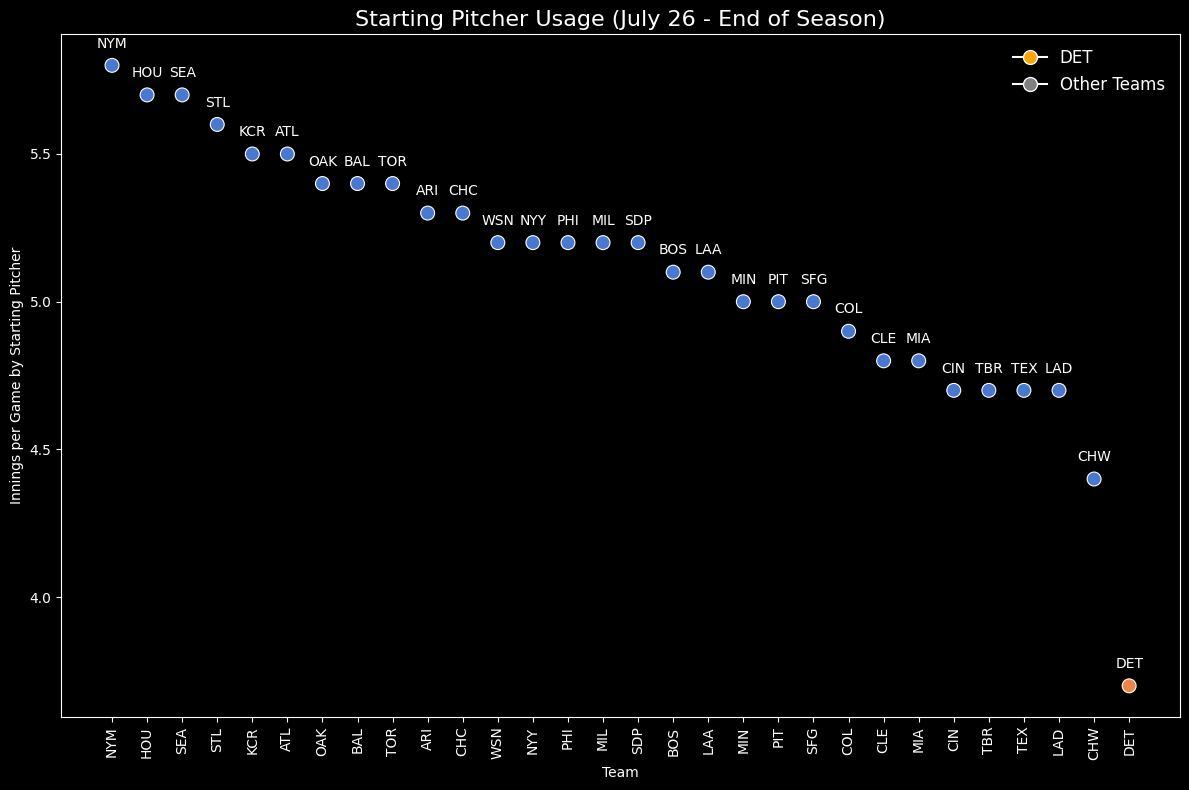

In [ ]:
# Sort the DataFrame by 'IP/G' in descending order
df2 = df2.sort_values(by='IP/G', ascending=False)

# Set the dark background style
plt.style.use('dark_background')

# Assign a color for Detroit (DET) and a default color for others
df2['Color'] = df2['Team'].apply(lambda x: '#00B5E2' if x == 'DET' else 'gray')

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2, x='Team', y='IP/G', hue='Color', palette='muted', s=100)

# Label each point with the team name
for i in range(df2.shape[0]):
    plt.text(x=i, y=df2['IP/G'].iloc[i] + 0.05, s=df2['Team'].iloc[i], ha='center', va='bottom', fontsize=10, color='white')

# Customize the plot
plt.xticks(rotation=90, color='white')  # Rotate team names for better readability
plt.yticks(color='white')
plt.xlabel('Team', color='white')
plt.ylabel('Innings per Game by Starting Pitcher', color='white')
plt.title('Starting Pitcher Usage (July 26 - End of Season)', fontsize=16, color='white')

# Add a legend
plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10),  # Detroit color
             plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10)],  # Other teams
    labels=['DET', 'Other Teams'],
    loc='upper right',
    frameon=False,
    fontsize=12,
    facecolor='black',
    edgecolor='white'
)

# Display the plot
plt.tight_layout()
plt.show()

Pitching Count

In [ ]:
df5 = pd.read_csv('pitching list.csv')

In [ ]:
from collections import Counter
import csv
import re

In [ ]:
# Function to extract the name before the parenthesis
def extract_name(text):
    # Match everything before the first '(' (if any)
    match = re.match(r'([A-Za-z.]+(?:\.[A-Za-z]+)?)', text)
    return match.group(1) if match else text

# Apply the function to the 'Player' column
df5['Player'] = df5['Pitchers'].apply(extract_name)

In [ ]:
# Count occurrences of each name
name_counts = df5['Player'].value_counts()
name_counts.to_excel('name_counts.xlsx', header=['Count'], index=True)


Line Charts

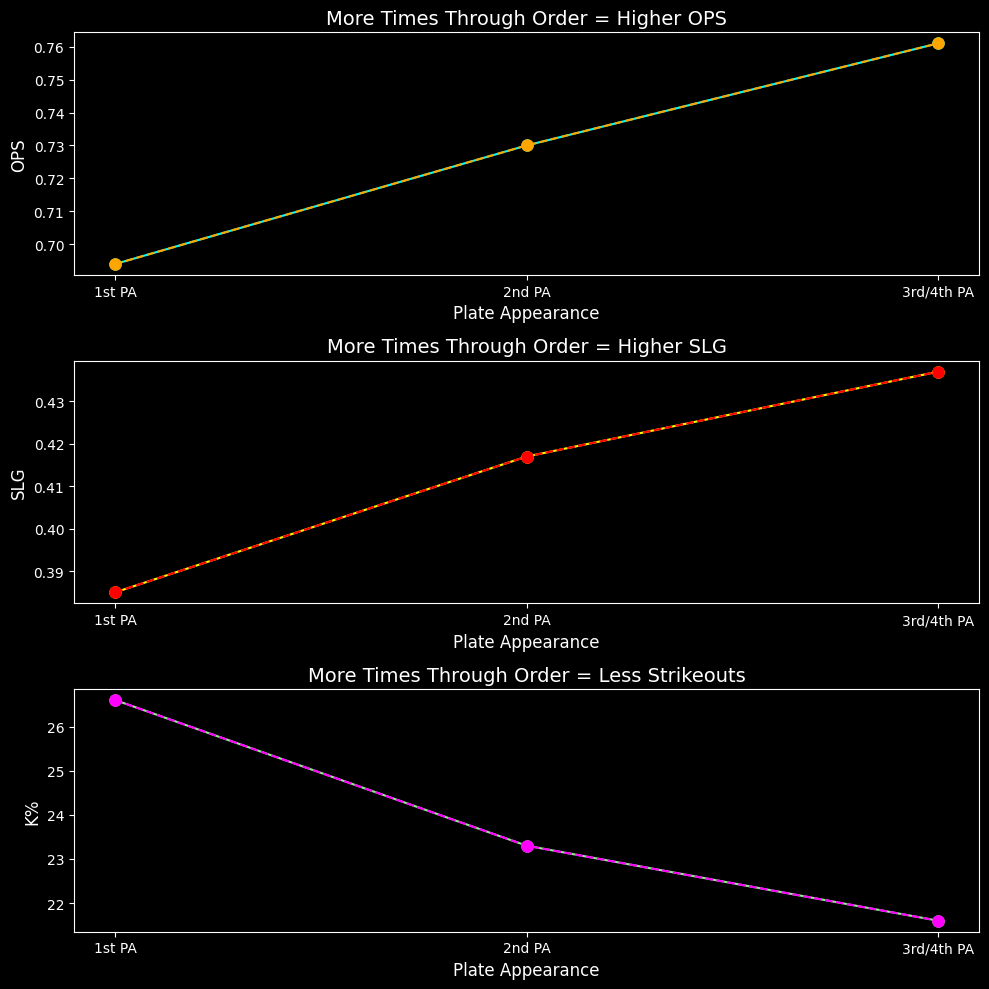

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plate appearances and metrics
pa_labels = ['1st PA', '2nd PA', '3rd/4th PA']
ops_sp = [0.694, 0.730, 0.761]
ops_rp = [0.694, 0.730, 0.761]
slg_sp = [0.385, 0.417, 0.437]
slg_rp = [0.385, 0.417, 0.437]
k_percent_sp = [26.6, 23.3, 21.6]
k_percent_rp = [26.6, 23.3, 21.6]

# Set the dark background theme
plt.style.use('dark_background')

# X-axis positions for plate appearances
x = np.arange(len(pa_labels))

# Create the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot OPS vs. Plate Appearance
axs[0].plot(x, ops_sp, marker='o', label='SP OPS', color='cyan', linestyle='-', markersize=8)
axs[0].plot(x, ops_rp, marker='o', label='RP OPS', color='orange', linestyle='--', markersize=8)
axs[0].set_title('More Times Through Order = Higher OPS', fontsize=14)
axs[0].set_xlabel('Plate Appearance', fontsize=12)
axs[0].set_ylabel('OPS', fontsize=12)
axs[0].set_xticks(x)
axs[0].set_xticklabels(pa_labels)


# Plot SLG vs. Plate Appearance
axs[1].plot(x, slg_sp, marker='o', label='SP SLG', color='yellow', linestyle='-', markersize=8)
axs[1].plot(x, slg_rp, marker='o', label='RP SLG', color='red', linestyle='--', markersize=8)
axs[1].set_title('More Times Through Order = Higher SLG', fontsize=14)
axs[1].set_xlabel('Plate Appearance', fontsize=12)
axs[1].set_ylabel('SLG', fontsize=12)
axs[1].set_xticks(x)
axs[1].set_xticklabels(pa_labels)

# Plot K% vs. Plate Appearance
axs[2].plot(x, k_percent_sp, marker='o', label='SP K%', color='lightgreen', linestyle='-', markersize=8)
axs[2].plot(x, k_percent_rp, marker='o', label='RP K%', color='magenta', linestyle='--', markersize=8)
axs[2].set_title('More Times Through Order = Less Strikeouts', fontsize=14)
axs[2].set_xlabel('Plate Appearance', fontsize=12)
axs[2].set_ylabel('K%', fontsize=12)
axs[2].set_xticks(x)
axs[2].set_xticklabels(pa_labels)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


ML Model

In [4]:
df5 = pd.read_csv('Book7.csv')

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'df5' already contains the necessary stats and the 'wins' column
# Prepare the features (stats) and the target (wins)
X = df5[['ERA', 'K/9', 'BB/9', 'K/BB', 'HR/9', 'WHIP', 'BABIP', 'H/9']]  # Features (stats)
y = df5['W']  # Target variable (wins)

In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display feature importance
print(importance_df)

  Feature  Importance
0    BB/9    0.173967
1     H/9    0.152826
2    K/BB    0.137250
3    WHIP    0.131554
4     ERA    0.131488
5     K/9    0.124485
6   BABIP    0.088184
7    HR/9    0.060247


In [7]:
# Predict wins for all teams using the trained model
df5['predicted_wins'] = model.predict(X)

# Rank teams based on predicted wins
df5['predicted_rank'] = df5['predicted_wins'].rank(ascending=False)

# Sort the DataFrame by predicted rank
df5 = df5.sort_values(by='predicted_wins', ascending = False)


In [8]:
# Weights for each stat
weights = {
    'ERA': 0.131488,
    'K/9': 0.124485,
    'BB/9': 0.173967,
    'K/BB': 0.137250,
    'HR/9': 0.060247,
    'WHIP': 0.131554,
    'BABIP': 0.088184,
    'H/9': 0.152826
}

In [9]:
# Function to calculate the score for each team based on the weighted stats
def calculate_score(row, weights):
    score = 0
    score += weights['ERA'] * row['ERA']
    score += weights['K/9'] * row['K/9']
    score += weights['BB/9'] * row['BB/9']
    score += weights['K/BB'] * row['K/BB']
    score += weights['HR/9'] * row['HR/9']
    score += weights['WHIP'] * row['WHIP']
    score += weights['BABIP'] * row['BABIP']
    score += weights['H/9'] * row['H/9']
    return score

In [10]:
# Apply the score calculation for each team
df5['score'] = df5.apply(lambda row: calculate_score(row, weights), axis=1)

In [11]:
# Rank teams based on the score (lower score means better)
df5['rank'] = df5['score'].rank(ascending=False)

In [12]:
# Sort the DataFrame by rank to see the teams ordered by their pitching performance
df_sorted = df5.sort_values(by='score', ascending = False)


In [13]:
# Display the ranked teams along with their scores
df_top_10 = df_sorted[['TEAM', 'score', 'predicted_wins', 'W', 'IP/GS']].head(10)
df_top_10

,TEAM,score,predicted_wins,W,IP/GS
11,Twins,4.240688,89.13,82,5.26
2,White Sox,4.183488,53.45,41,4.82
12,Nationals,4.168155,74.68,71,5.26
5,Guardians,4.163214,89.30,92,5.00
1,Giants,4.162638,84.11,80,4.81
4,Dodgers,4.095559,94.71,98,4.92
22,Braves,4.087268,87.63,89,5.58
3,Brewers,4.073487,90.64,93,4.90
10,Athletics,4.057381,65.09,69,5.18
16,Yankees,4.051382,91.19,94,5.38


from matplotlib import pyplot as plt
df_top_10['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top_10['predicted_wins'].plot(kind='hist', bins=20, title='predicted_wins')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top_10['W'].plot(kind='hist', bins=20, title='W')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top_10['IP/GS'].plot(kind='hist', bins=20, title='IP/GS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top_10.plot(kind='scatter', x='score', y='predicted_wins', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top_10.plot(kind='scatter', x='predicted_wins', y='W', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top_10.plot(kind='scatter', x='W', y='IP/GS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top_10['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_top_10['predicted_wins'].plot(kind='line', figsize=(8, 4), title='predicted_wins')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_top_10['W'].plot(kind='line', figsize=(8, 4), title='W')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_top_10['IP/GS'].plot(kind='line', figsize=(8, 4), title='IP/GS')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
df_top_10.to_csv('top_10_teams.csv', index=False)